In [ ]:
import numpy as np
import tensorflow_hub as hub
import tensorflow as tf
import matplotlib.pylab as plt
import os
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [ ]:
TFHub_Model ="https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/4"
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 64

In [ ]:
data_dir = tf.keras.utils.get_file(
    'cats_and_dogs_filtered_new',
    'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip',
    extract=True,
    cache_dir='/content')

68616192/68606236 [==============================] - 0s 0us/step


In [ ]:
data_dir = "/content/datasets/cats_and_dogs_filtered"

In [ ]:
train_dir = os.path.join(data_dir, 'train')
validation_dir = os.path.join(data_dir, 'validation')

train_dataset = image_dataset_from_directory(train_dir,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMAGE_SIZE)

Found 2000 files belonging to 2 classes.


In [ ]:
plt.figure(figsize=(20, 20))
for images, labels in train_dataset.take(1):
    for i in range(25):
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")

In [ ]:
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [ ]:
train_generator = train_datagen.flow_from_directory(data_dir, subset="training", shuffle=True, target_size=IMAGE_SIZE, batch_size=BATCH_SIZE)

valid_generator = valid_datagen.flow_from_directory(data_dir, subset="validation", shuffle=False, target_size=IMAGE_SIZE, batch_size=BATCH_SIZE)

Found 2400 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


In [ ]:
IMAGE_SIZE + (3,)

(224, 224, 3)

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.InputLayer(input_shape=IMAGE_SIZE + (3,)),
  hub.KerasLayer(TFHub_Model, trainable=True),
  tf.keras.layers.Dropout(rate=0.2),
  tf.keras.layers.Dense(train_generator.num_classes)
])
model.build((None,)+IMAGE_SIZE+(3,))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,226,434
Non-trainable params: 34,112
_________________________________________________________________


In [ ]:
model.compile(
  optimizer=tf.keras.optimizers.SGD(lr=0.005, momentum=0.9),
  loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True, label_smoothing=0.1),
  metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
hist = model.fit(
    train_generator,
    epochs=5,
    validation_data=valid_generator).history

Epoch 1/5
38/38 [==============================] - 37s 497ms/step - loss: 0.8747 - accuracy: 0.6029 - val_loss: 0.8517 - val_accuracy: 0.6217
Epoch 2/5
38/38 [==============================] - 17s 439ms/step - loss: 0.6024 - accuracy: 0.7804 - val_loss: 0.8640 - val_accuracy: 0.5983
Epoch 3/5
38/38 [==============================] - 17s 443ms/step - loss: 0.4314 - accuracy: 0.9225 - val_loss: 0.9228 - val_accuracy: 0.5833
Epoch 4/5
38/38 [==============================] - 17s 440ms/step - loss: 0.3436 - accuracy: 0.9858 - val_loss: 0.9303 - val_accuracy: 0.5817
Epoch 5/5
38/38 [==============================] - 17s 441ms/step - loss: 0.3210 - accuracy: 0.9937 - val_loss: 0.9464 - val_accuracy: 0.6017


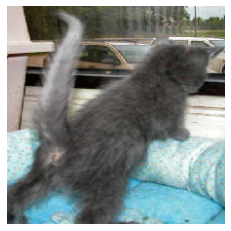

True label: 1
Predicted label: 0


In [ ]:
x, y = next(valid_generator)
image = x[0, :, :, :]
true_index = np.argmax(y[0])
plt.imshow(image)
plt.axis('off')
plt.show()

prediction_scores = model.predict(np.expand_dims(image, axis=0))
predicted_index = np.argmax(prediction_scores)
print("True label: " + str(true_index))
print("Predicted label: " + str(predicted_index))